In [89]:
#random forest bla bla 
#imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier

from scipy.stats import randint

import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
# column_indices = {name: i for i, name in enumerate(df_avg.columns)}

# n = len(df_avg)
# train_df = df_avg[0:int(n*0.7)]
# val_df = df_avg[int(n*0.7):int(n*0.9)]
# test_df = df_avg[int(n*0.9):]

# num_features = df_avg.shape[1]

Accuracy: 0.85


c:\Users\eigenaar\Documents\Data_mining\Data-Mining-For-The-Girls\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'max_depth': 14, 'n_estimators': 396}
              precision    recall  f1-score   support

         6.0       1.00      0.67      0.80         3
         7.0       0.82      1.00      0.90        14
         8.0       1.00      0.33      0.50         3

    accuracy                           0.85        20
   macro avg       0.94      0.67      0.73        20
weighted avg       0.88      0.85      0.83        20



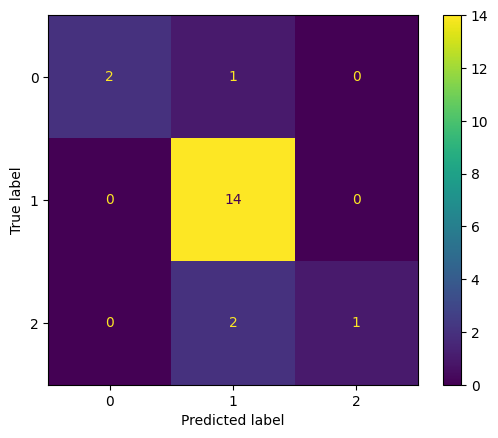

In [79]:
#random forest classifier
instance_based_df = pd.read_csv("data_new/instance_based_df.csv")
instance_based_target = instance_based_df['mood_avg_next']
y = instance_based_target.round() #y is je target dus de mood_avg_next
instance_based_cont = instance_based_df.drop('mood_avg_next', axis = 1)
X = instance_based_cont.round() #X zijn je features

column_indices = {name: i for i, name in enumerate(X.columns)}
n = len(X)

#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

#model fitting en evaluation
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

#prediction
y_prediction = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

#hyperparameter tuning
param_dist = {'n_estimators': randint(20,500),
              'max_depth': randint(1,20)}

#random search gebruiken om de beste hyperparameters te vinden, n_iter (the number of parameter settings that are sampled) and cv (the number of cross-validation folds to use)
rand_search = RandomizedSearchCV(rf_classifier, param_distributions= param_dist, n_iter=5, cv=5)  
                                                                                                  
#random search fitten op data
rand_search.fit(X_train, y_train)

#create variable for best model
best_rf_classifier = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

#confusion matrix (tradeoff between false positives (top right) and false negatives(bottom left)
y_pred = best_rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix= cm).plot()

#precision, recall, accuracy, F1-score, support
print(classification_report(y_test, y_pred))

In [94]:
#random forest regression
instance_based_df = pd.read_csv("data_new/instance_based_df.csv")
instance_based_target = instance_based_df['mood_avg_next']
y = instance_based_target #y is je target dus de mood_avg_next
instance_based_cont = instance_based_df.drop('mood_avg_next', axis = 1)
X = instance_based_cont #X zijn je features
column_indices = {name: i for i, name in enumerate(X.columns)}
n = len(X)

#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
#model fitting en evaluation
rf_regression = RandomForestRegressor()
rf_regression.fit(X_train, y_train)

#prediction
predictions = rf_regression.predict(X_test)

#evaluation
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, predictions)
print(f"R2 score: {r2}")

mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

#hyperparameter tuning
param_dist = {'n_estimators': randint(20,500),
              'max_depth': randint(1,20)}

#random search gebruiken om de beste hyperparameters te vinden, n_iter (the number of parameter settings that are sampled) and cv (the number of cross-validation folds to use)
rand_search = RandomizedSearchCV(rf_regression, param_distributions= param_dist, n_iter=5, cv=5)  
                                                                                                  
#random search fitten op data
rand_search.fit(X_train, y_train)

#create variable for best model
best_rf_regressor = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)



Mean Squared Error: 0.052911818123854426
R2 score: -0.022619069314638418
Mean Absolute Error: 0.1949313198457145
Best hyperparameters: {'max_depth': 2, 'n_estimators': 103}


In [ ]:
#random forest classifier
instance_based_df = pd.read_csv("data_new/instance_based_df.csv")
print(instance_based_df)
instance_based_df_discrete = instance_based_df.round()
instance_based_target = instance_based_df['mood_avg_next']
y = instance_based_target.round()
instance_based_cont = instance_based_df.drop('mood_avg_next', axis = 1)
X = instance_based_cont.round()

# column_indices = {name: i for i, name in enumerate(X.columns)}
# n = len(X)

#data split
train_df = instance_based_df_discrete[0:int(n*0.7)]
print(train_df)
val_df = instance_based_df_discrete[int(n*0.7):int(n*0.9)]
test_df = instance_based_df_discrete[int(n*0.9):]

# num_features = X.shape[1]
X_train = train_df.drop('mood_avg_next', axis = 1)
y_train = train_df['mood_avg_next']
X_val = val_df.drop('mood_avg_next', axis = 1)
y_val = val_df['mood_avg_next']
X_test = test_df.drop('mood_avg_next', axis = 1)
y_test = test_df['mood_avg_next']

# #model fitting en evaluation
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train)

# #prediction
# y_prediction = rf_classifier.predict(X_test)
# accuracy = accuracy_score(y_test, y_prediction)
# print("Accuracy:", accuracy)

# #hyperparameter tuning
# param_dist = {'n_estimators': randint(20,500),
#               'max_depth': randint(1,20)}

# #random search gebruiken om de beste hyperparameters te vinden, n_iter (the number of parameter settings that are sampled) and cv (the number of cross-validation folds to use)
# rand_search = RandomizedSearchCV(rf_classifier, param_distributions= param_dist, n_iter=5, cv=5)  
                                                                                                  
# #random search fitten op data
# rand_search.fit(X_train, y_train)

# #create variable for best model
# best_rf_classifier = rand_search.best_estimator_
# print('Best hyperparameters:', rand_search.best_params_)

# #confusion matrix (tradeoff between false positives (top right) and false negatives(bottom left)
# y_pred = best_rf_classifier.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# ConfusionMatrixDisplay(confusion_matrix= cm).plot()

# #precision, recall, accuracy, F1-score, support
# print(classification_report(y_test, y_pred))

    mood_avg  utilities_avg  social_avg  arousal_avg  screen_avg  office_avg  \
0   7.223611      13.062000   33.491833     0.259722   55.066533   17.086000   
1   7.234722      13.062000   33.491833     0.148611   55.066533   17.086000   
2   7.106944      13.062000   33.491833     0.126389   55.066533   17.086000   
3   7.019444      13.062000   33.491833     0.201389   55.066533   17.086000   
4   6.979861      13.062000   51.066854     0.015972   53.571921   17.086000   
..       ...            ...         ...          ...         ...         ...   
91  7.200000       2.164840   63.358533    -0.300000   94.329205   44.738625   
92  7.250000       2.110683   74.889542    -0.500000   94.590693   44.738625   
93  7.333333       2.072000   93.483685    -0.666667  112.722116   44.738625   
94  7.250000       2.072000  122.092500    -1.250000  145.106578   44.738625   
95  6.500000       2.072000  190.760000    -1.500000  161.599714   44.738625   

    call_avg  other_avg  valence_avg  u